In [19]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [8]:
import tensorflow as tf

IMAGE_SIZE = 224  # Example image size
BATCH_SIZE = 32   # Example batch size

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [11]:
68*32

2176

In [13]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1]


In [15]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].shape)

(224, 224, 3)


Found 2152 files belonging to 3 classes.


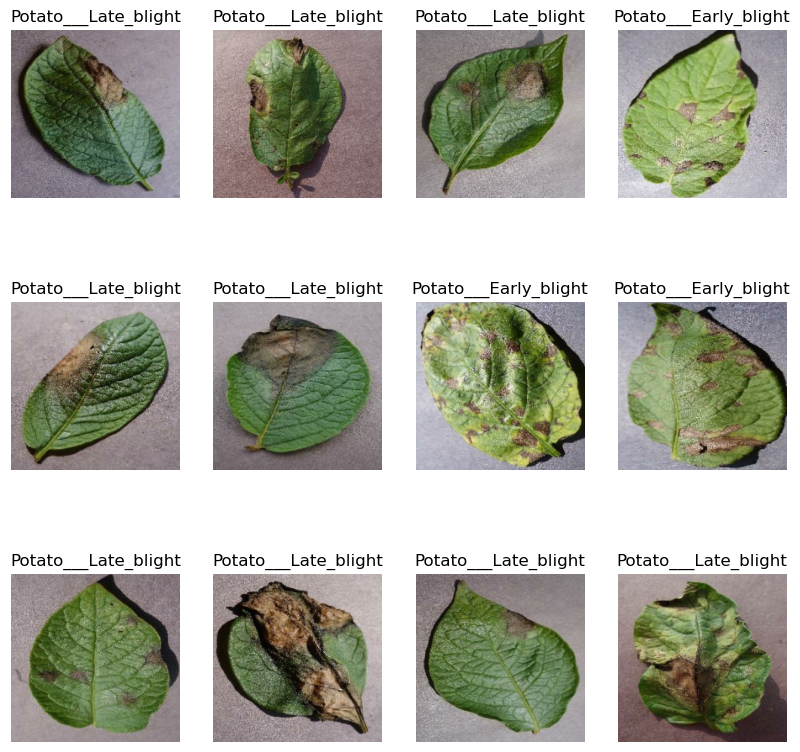

In [24]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

IMAGE_SIZE = 224  # Example image size
BATCH_SIZE = 32   # Example batch size

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names

for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    plt.show()


In [25]:
len(dataset)

68

In [29]:
import tensorflow as tf

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Calculate the size of each subset
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)  # 80% training
val_size = int(0.1 * dataset_size)    # 10% validation
test_size = dataset_size - train_size - val_size  # Remaining 10% for testing

# Split the dataset
train_dataset = dataset.take(train_size)
val_test_dataset = dataset.skip(train_size)
val_dataset = val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)

# Print the dataset sizes (optional)
print(f"Training dataset size: {train_size}")
print(f"Validation dataset size: {val_size}")
print(f"Test dataset size: {test_size}")

# Example training loop
num_epochs = 10
for epoch in range(num_epochs):
    # Simulate training process
    print(f"Epoch {epoch+1}/{num_epochs} - Training progress: {int(((epoch+1)/num_epochs)*100)}%")


Found 2152 files belonging to 3 classes.
Training dataset size: 54
Validation dataset size: 6
Test dataset size: 8
Epoch 1/10 - Training progress: 10%
Epoch 2/10 - Training progress: 20%
Epoch 3/10 - Training progress: 30%
Epoch 4/10 - Training progress: 40%
Epoch 5/10 - Training progress: 50%
Epoch 6/10 - Training progress: 60%
Epoch 7/10 - Training progress: 70%
Epoch 8/10 - Training progress: 80%
Epoch 9/10 - Training progress: 90%
Epoch 10/10 - Training progress: 100%


In [30]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [31]:
train_ds = dataset.take(54)
len(train_ds)

54

In [32]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [33]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [34]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [35]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [36]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size , seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds , test_ds

In [37]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [38]:
len(train_ds)

54

In [39]:
len(val_ds)

6

In [40]:
len(test_ds)

8

In [41]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Example image size

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [45]:
import tensorflow as tf
from tensorflow.keras import layers

augmentation_layers = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [49]:
import tensorflow as tf
from tensorflow.keras import models, layers

IMAGE_SIZE = 224  # Example image size
CHANNELS = 3      # Example number of channels (e.g., RGB)
n_classes = 3     # Example number of classes

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [53]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 3
EPOCHS = 10  # Example number of epochs

# Preprocessing and augmentation layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Build the model
model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model
model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_dataset
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 827ms/step - accuracy: 0.5236 - loss: 0.9171 - val_accuracy: 0.5885 - val_loss: 0.9397
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 764ms/step - accuracy: 0.6621 - loss: 0.6884 - val_accuracy: 0.5990 - val_loss: 0.9456
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 769ms/step - accuracy: 0.7591 - loss: 0.5370 - val_accuracy: 0.9271 - val_loss: 0.2709
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 788ms/step - accuracy: 0.8742 - loss: 0.3155 - val_accuracy: 0.8958 - val_loss: 0.2864
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 841ms/step - accuracy: 0.8817 - loss: 0.2882 - val_accuracy: 0.9062 - val_loss: 0.2311
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 782ms/step - accuracy: 0.9305 - loss: 0.1798 - val_accuracy: 0.9271 - val_loss: 0.1624
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 753ms/step - accuracy: 0.9425 - loss: 0.1620 - val_accuracy: 0.9219 - val_loss: 0.1636
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 763ms/step - accuracy: 0.9532 - loss: 0.1138 - val_accu

In [54]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.9440 - loss: 0.1112


In [55]:
scores

[0.11895385384559631, 0.94140625]

In [56]:
history

import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
pip install tensorflow
pip install tensorflow
pip install tensorflow
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import tensorflow as tf

IMAGE_SIZE = 224  # Example image size
BATCH_SIZE = 32   # Example batch size

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
class_names
len(dataset)
68*32
for iamge_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    pri

In [59]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 3
EPOCHS = 10  # Example number of epochs

# Preprocessing and augmentation layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Build the model
model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model and store the history
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_dataset
)

# Access the history parameters
print(history.params)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 824ms/step - accuracy: 0.4658 - loss: 0.9501 - val_accuracy: 0.4948 - val_loss: 0.8384
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 787ms/step - accuracy: 0.6084 - loss: 0.8358 - val_accuracy: 0.6094 - val_loss: 0.8243
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 803ms/step - accuracy: 0.7464 - loss: 0.5993 - val_accuracy: 0.8385 - val_loss: 0.4289
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 772ms/step - accuracy: 0.8202 - loss: 0.4671 - val_accuracy: 0.8385 - val_loss: 0.4267
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 762ms/step - accuracy: 0.8337 - loss: 0.4175 - val_accuracy: 0.8802 - val_loss: 0.2938
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 756ms/step - accuracy: 0.8835 - loss: 0.2920 - val_accuracy: 0.8906 - val_loss: 0.2867
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 775ms/step - accuracy: 0.8554 - loss: 0.3324 - val_accuracy: 0.9219 - val_loss: 0.1785
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 777ms/step - accuracy: 0.9369 - loss: 0.1667 - val_accu

In [60]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

[0.5023148059844971,
 0.6388888955116272,
 0.7696759104728699,
 0.8258101940155029,
 0.8668981194496155,
 0.8518518805503845,
 0.8836805820465088,
 0.9334490895271301,
 0.9461805820465088,
 0.9392361044883728]

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 818ms/step - accuracy: 0.4626 - loss: 0.9466 - val_accuracy: 0.6406 - val_loss: 0.7960
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 783ms/step - accuracy: 0.6611 - loss: 0.7490 - val_accuracy: 0.7500 - val_loss: 0.5243
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 783ms/step - accuracy: 0.7325 - loss: 0.5739 - val_accuracy: 0.8594 - val_loss: 0.3636
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 778ms/step - accuracy: 0.8223 - loss: 0.4122 - val_accuracy: 0.8073 - val_loss: 0.4194
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 767ms/step - accuracy: 0.8136 - loss: 0.4440 - val_accuracy: 0.8750 - val_loss: 0.2879
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 769ms/step - accuracy: 0.8425 - loss: 0.3443 - val_accuracy: 0.9427 - val_loss: 0.2086
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 797ms/step - accuracy: 0.8614 - loss: 0.3278 - val_accuracy: 0.9271 - val_loss: 0.1990
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 784ms/step - accuracy: 0.9084 - loss: 0.2125 - val_accu

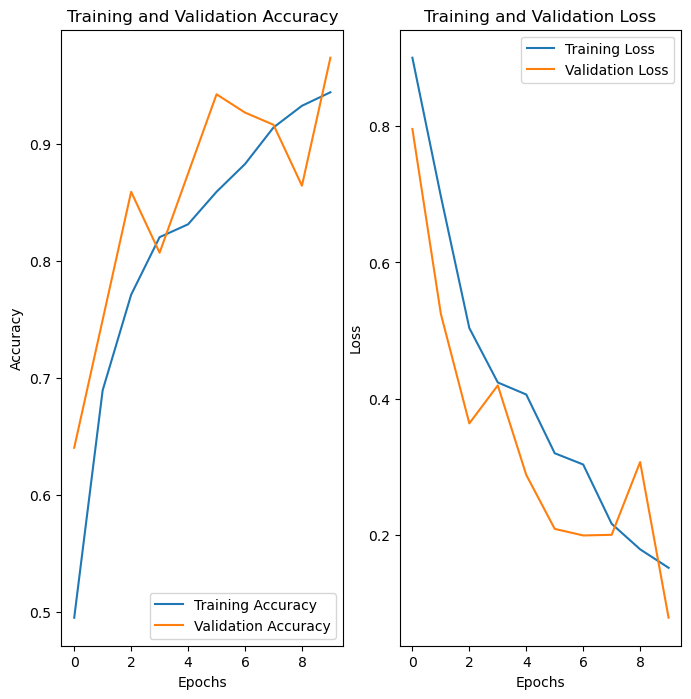

In [64]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 3
EPOCHS = 10  # Example number of epochs

# Preprocessing and augmentation layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Build the model
model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model and store the history
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_dataset
)

# Extracting accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation accuracy and loss
plt.figure(figsize=(8, 8))

# Subplot for training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Subplot for training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()


first image to predict
first image's actual lable: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
[9.9959701e-01 4.0289824e-04 1.7193430e-07]


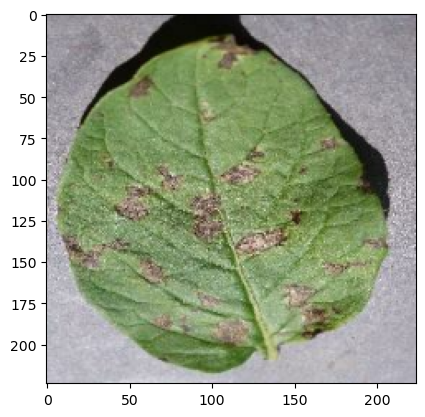

In [70]:
for images_batch , labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual lable:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])

In [72]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(imp_array , 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


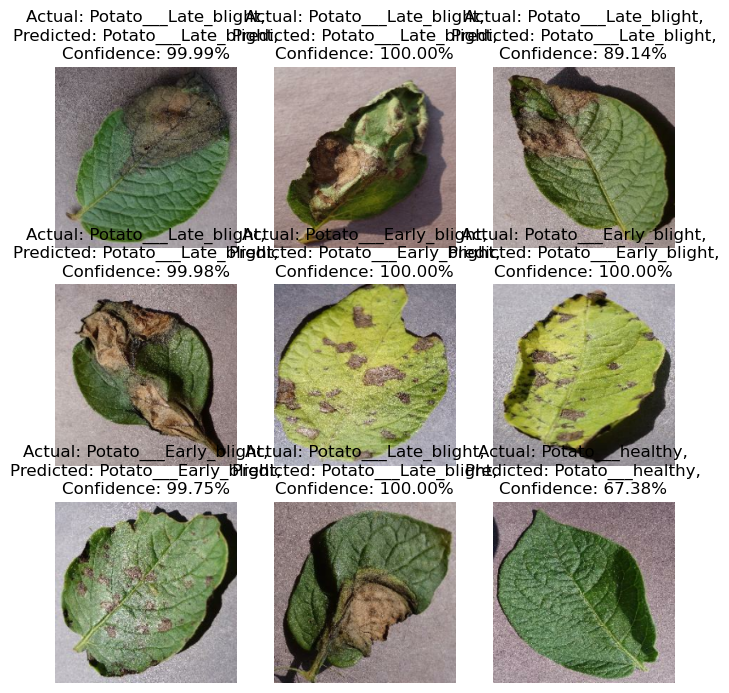

In [77]:
import numpy as np  # Make sure to import NumPy

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0]) * 100
    return predicted_class, confidence

# Use the predict function
plt.figure(figsize=(8, 8))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence:.2f}%")
    plt.axis("off")
plt.show()


In [82]:
import os

# Define the model version and directory
model_version = 2
model_dir = "../models/"

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the model
model.save(f"{model_dir}{model_version}.keras")
